In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.datasets import load_iris

## Variables

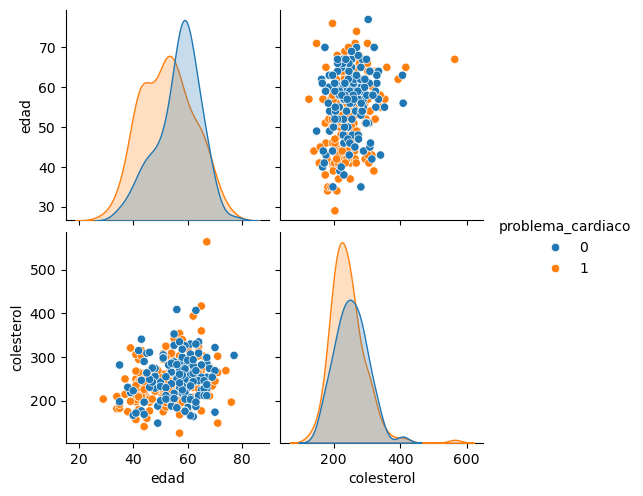

In [58]:
df = pd.read_csv('datasets/Pacientes.csv')
df = df.dropna()
variablex = df[['edad', 'colesterol']].values.reshape((-1,2))
variabley = df[['problema_cardiaco']].values.reshape((-1,1))
sns.pairplot(df, hue="problema_cardiaco")

## Crear arboles de decision

In [64]:
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=4)

modelTree = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=2)
modelTree.fit(x_train, y_train)

y_pred = modelTree.predict(x_test)
f1 = f1_score(y_test, y_pred)
percent = modelTree.score(x_test, y_test)
print(f'f1_score: {f1}')
print(f'El modelo obtuvo {percent*100}% de precision en la clasificacion')

f1_score: 0.6984126984126984
El modelo obtuvo 68.33333333333333% de precision en la clasificacion


# Visualizar el arbol

|--- edad <= 55.50
|   |--- colesterol <= 272.50
|   |   |--- edad <= 42.50
|   |   |   |--- class: 1
|   |   |--- edad >  42.50
|   |   |   |--- class: 1
|   |--- colesterol >  272.50
|   |   |--- colesterol <= 292.50
|   |   |   |--- class: 0
|   |   |--- colesterol >  292.50
|   |   |   |--- class: 1
|--- edad >  55.50
|   |--- edad <= 63.50
|   |   |--- colesterol <= 248.50
|   |   |   |--- class: 0
|   |   |--- colesterol >  248.50
|   |   |   |--- class: 0
|   |--- edad >  63.50
|   |   |--- colesterol <= 258.50
|   |   |   |--- class: 0
|   |   |--- colesterol >  258.50
|   |   |   |--- class: 1



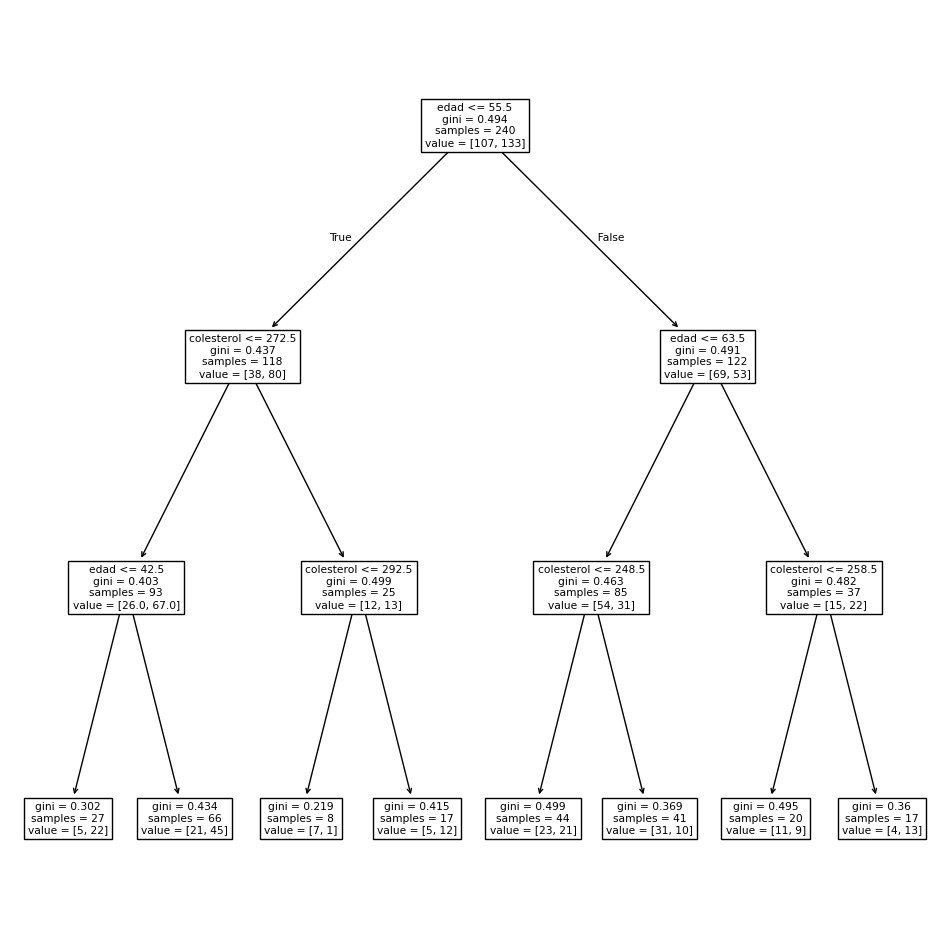

In [60]:
print(tree.export_text(modelTree, feature_names=["edad", "colesterol"]))

plt.figure(figsize=(12, 12))
tree.plot_tree(modelTree, feature_names=["edad", "colesterol"])
plt.show()

# Matriz de confusion

Clase 0: 28
Clase 1: 32


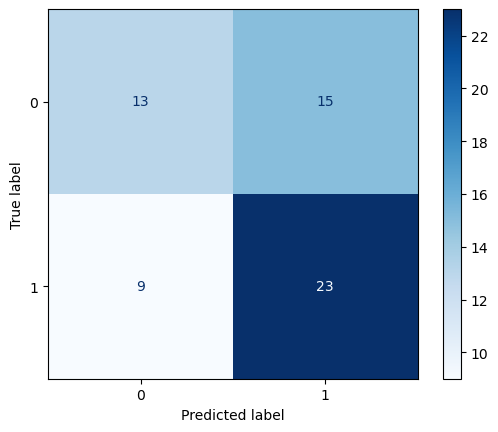

In [61]:
unique, counts = np.unique(y_test, return_counts=True)

for i in range(len(unique)):
    print(f'Clase {unique[i]}: {counts[i]}')

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=modelTree.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


##### ¿Fue mejor el desempeño del árbol de decisión o el modelo de regresión logistica? ¿Por qué?
El del modelo de regresión logística, obtuvo un porcentaje de precisión del 70%, mientras el arbol de decisión obtuvo sólo el 60%

#### ¿Cómo cambian los resultados del model score y el f1 score obtenidas por el modelo al modificar la máxima profundidad del arbol?
Entre mayor profundidad, se obtuvieron resultados menos precisos.

#### ¿Los resultados obtenidos fueron mejor que los resultados obtenidos en el modelo de regresión logistica? ¿Por qué?
No, la partición no es muy buena, y se hace un sobreajuste de los datos.